In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Flatten, Dropout, Dense, Conv2D, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import HeUniform
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

import os

In [2]:
for dirname, _, filenames in os.walk(r'C:\Users\student\Desktop\TY_CSAI_17\deep learning\MNISTdata'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

    

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [4]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [5]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

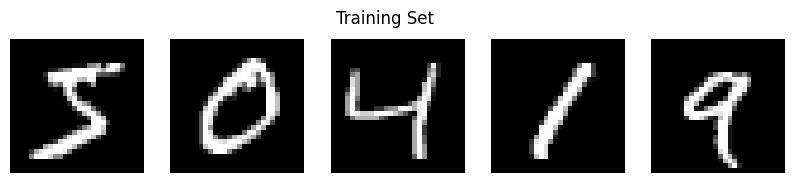

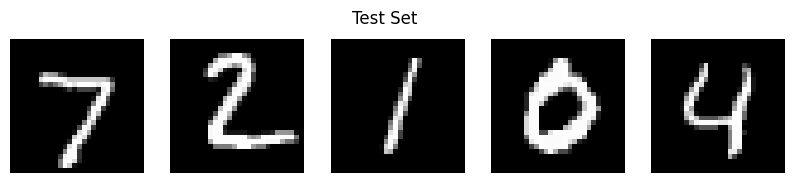

In [7]:
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(X_train[i].reshape(28, 28), cmap="gray")
    axes[i].axis('off')
plt.suptitle('Training Set')
plt.show()
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(X_test[i].reshape(28, 28), cmap="gray")
    axes[i].axis('off')
plt.suptitle('Test Set')
plt.show()

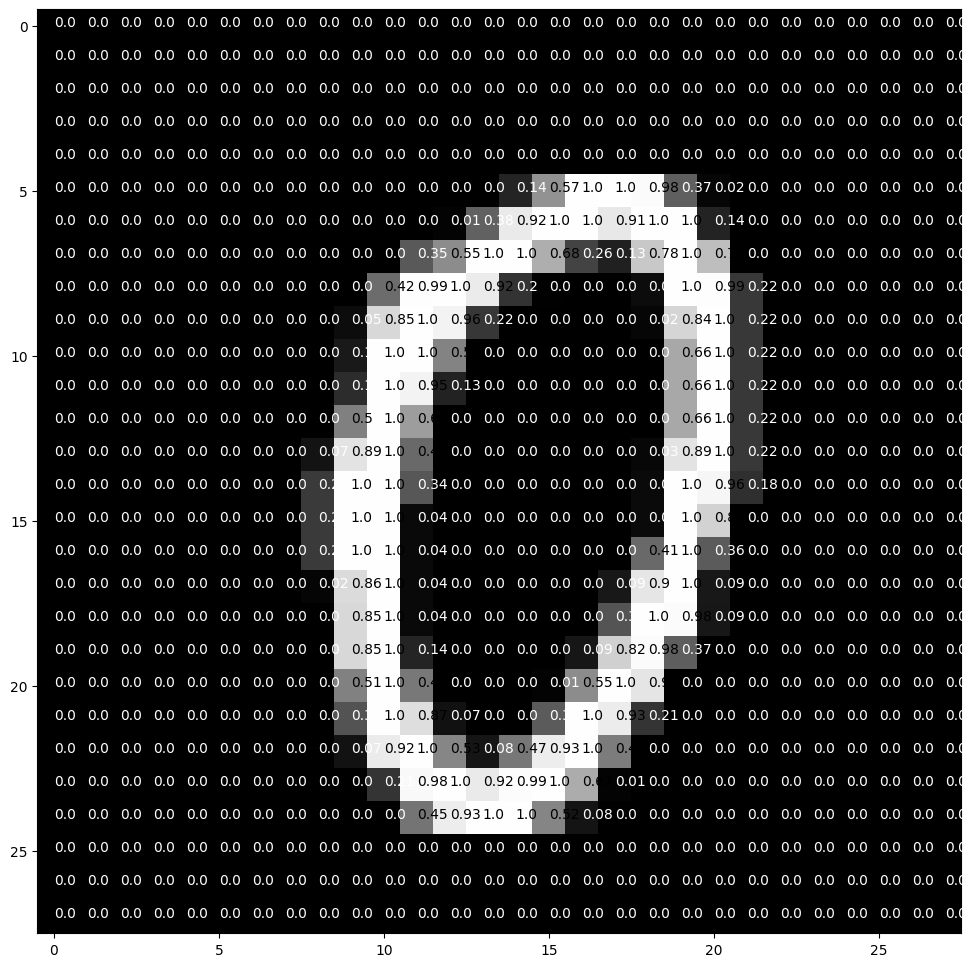

In [8]:
img = X_train[1000]
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.imshow(img, cmap="gray")
width, height, channels = img.shape
threshold = img.max() / 2.5
for x in range(width):
    for y in range(height):
        pixel_value = img[x][y][0]
        ax.annotate(str(round(pixel_value, 2)), xy=(y, x),
                    color='white' if pixel_value < threshold else 'black')

plt.show()

In [9]:
#build model
model = Sequential()
num_labels=10

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_labels, activation='softmax'))

early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy" , metrics=["accuracy"])
fit = model.fit(X_train,y_train , epochs=5 , batch_size=64,validation_data=(X_test,y_test), callbacks=[early_stopping])

C:\Users\Admin\Documents\TY sem-2\CSAI-76\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 62s 63ms/step - accuracy: 0.9071 - loss: 0.3126 - val_accuracy: 0.9872 - val_loss: 0.0404
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 69s 73ms/step - accuracy: 0.9810 - loss: 0.0632 - val_accuracy: 0.9888 - val_loss: 0.0308
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 60s 64ms/step - accuracy: 0.9859 - loss: 0.0459 - val_accuracy: 0.9905 - val_loss: 0.0306
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 59s 63ms/step - accuracy: 0.9886 - loss: 0.0373 - val_accuracy: 0.9934 - val_loss: 0.0201
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 59s 62ms/step - accuracy: 0.9891 - loss: 0.0360 - val_accuracy: 0.9920 - val_loss: 0.0258


In [10]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9906 - loss: 0.0293
Test Loss: 0.020148053765296936
Test Accuracy: 0.993399977684021


In [11]:
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
print(y_pred_class)
print(y_true)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [12]:
class_labels = ['0','1','2','3','4','5','6','7','8','9']
report = classification_report(y_true, y_pred_class, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.98      1.00      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

